In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## **Exploring Data**

In [13]:
df = pd.read_csv('Little_Shop_Audio_Time_Series.csv')

In [14]:
df.shape

(430462, 102)

In [15]:
df.head()

,time,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12
0,0.00,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616877,0.777049,0.754111,0.828775,1.0,0.990170,0.695784,0.723710,0.982610,0.669992
1,0.01,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.404060,0.727749,0.733204,0.792786,1.0,0.512125,0.335576,0.288366,0.510961,0.196696
2,0.02,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616755,0.562211,0.492328,0.423163,1.0,0.549265,0.368115,0.372566,0.558006,0.206620
3,0.03,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.542632,0.560273,0.599804,0.522644,1.0,0.527692,0.800624,0.727872,0.510424,0.465569
4,0.04,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.603541,0.526591,0.638157,0.511667,1.0,0.585697,0.743051,0.640903,0.482272,0.468880


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430462 entries, 0 to 430461
Columns: 102 entries, time to chroma_12
dtypes: float64(102)
memory usage: 335.0 MB


In [17]:
df.head()

,time,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12
0,0.00,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616877,0.777049,0.754111,0.828775,1.0,0.990170,0.695784,0.723710,0.982610,0.669992
1,0.01,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.404060,0.727749,0.733204,0.792786,1.0,0.512125,0.335576,0.288366,0.510961,0.196696
2,0.02,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616755,0.562211,0.492328,0.423163,1.0,0.549265,0.368115,0.372566,0.558006,0.206620
3,0.03,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.542632,0.560273,0.599804,0.522644,1.0,0.527692,0.800624,0.727872,0.510424,0.465569
4,0.04,-440.1059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.603541,0.526591,0.638157,0.511667,1.0,0.585697,0.743051,0.640903,0.482272,0.468880


In [20]:
df.shape

(430462, 102)

In [21]:
df.describe()

,time,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12
count,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,...,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000,430462.000000
mean,2152.305000,-203.825325,11.988460,-7.155351,4.049186,-10.101447,-0.973018,-7.091721,0.677315,-4.753434,...,0.417265,0.450172,0.449350,0.434122,0.420375,0.422436,0.411584,0.408926,0.400420,0.404474
std,1242.638201,58.240411,21.132324,16.287035,12.139421,10.960293,9.542683,9.381386,8.139813,8.009959,...,0.298297,0.313243,0.305905,0.306917,0.309756,0.308386,0.299545,0.309202,0.302888,0.306536
min,0.000000,-440.105900,-69.489296,-82.566010,-62.985657,-64.790504,-50.396675,-54.079780,-37.796562,-42.891937,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1076.152500,-246.427353,-1.673717,-16.474689,-2.536390,-16.644509,-6.753753,-12.922944,-4.392527,-9.772498,...,0.161090,0.179452,0.185419,0.167275,0.151228,0.153068,0.151934,0.141950,0.139591,0.140746
50%,2152.305000,-199.913035,11.666594,-5.963240,5.125602,-9.127802,-0.286349,-6.436834,0.838049,-4.621278,...,0.362554,0.394629,0.401110,0.382076,0.356368,0.363264,0.357110,0.341462,0.336030,0.337465
75%,3228.457500,-158.767843,25.712759,3.018810,11.891152,-2.618593,5.429645,-0.698914,5.838453,0.205512,...,0.629231,0.687621,0.680474,0.662988,0.646610,0.647784,0.624640,0.628216,0.611815,0.617558
max,4304.610000,-39.825726,94.963590,65.862310,52.729874,38.965332,46.898415,44.449455,60.827490,47.103830,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.isnull().sum()

time         0
mfcc_1       0
mfcc_2       0
mfcc_3       0
mfcc_4       0
            ..
chroma_8     0
chroma_9     0
chroma_10    0
chroma_11    0
chroma_12    0
Length: 102, dtype: int64

This dataset should be cleaned before using it because it will create problems later on.

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(430462, 102)

In [25]:
df.duplicated().sum()

np.int64(0)

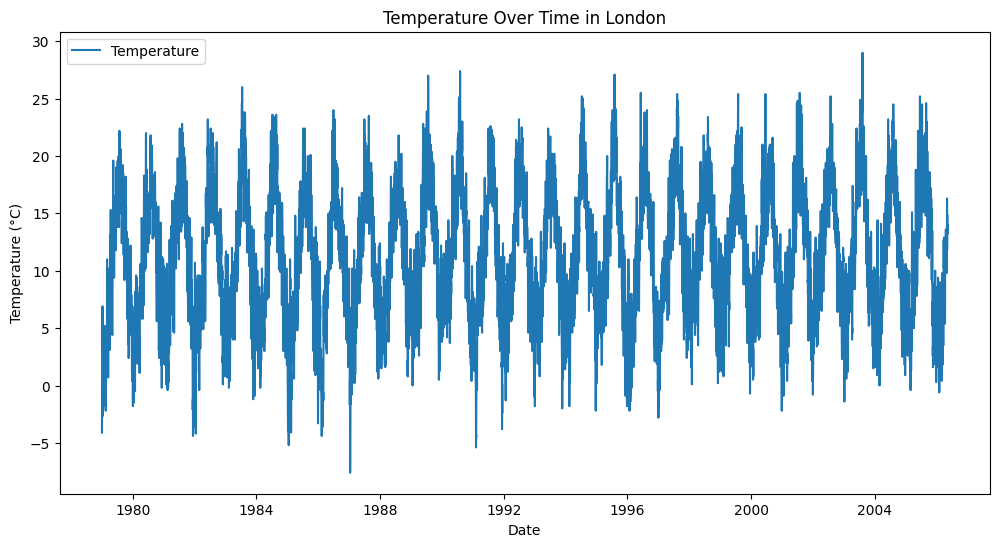

In [183]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['mean_temp'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time in London')
plt.legend()
plt.show()

In [184]:
for col in df.columns:
    if df[col].dtype != 'datetime64[ns]':
        print(f'Column: {col}')
        print(df[col].value_counts())
        print('---')
        print(df[col].nunique())
        print('\n')

Column: cloud_cover
cloud_cover
7.0    2286
6.0    2189
5.0    1634
8.0    1211
4.0    1135
3.0     668
2.0     443
1.0     281
0.0     104
Name: count, dtype: int64
---
9


Column: sunshine
sunshine
0.0     1686
0.1      387
0.2      185
0.3      161
0.4      113
        ... 
15.5       5
15.3       5
15.4       4
15.7       3
15.6       2
Name: count, Length: 158, dtype: int64
---
158


Column: global_radiation
global_radiation
12.0     237
13.0     180
16.0     119
15.0     113
17.0     103
        ... 
351.0      2
319.0      2
344.0      2
352.0      1
328.0      1
Name: count, Length: 340, dtype: int64
---
340


Column: max_temp
max_temp
 12.6    83
 11.1    78
 11.5    76
 13.9    74
 12.2    74
         ..
 36.5     1
 34.4     1
-2.1      1
-2.5      1
 33.7     1
Name: count, Length: 362, dtype: int64
---
362


Column: mean_temp
mean_temp
 10.8    99
 15.4    97
 8.0     95
 6.8     95
 11.2    94
         ..
-5.4      1
-4.6      1
-3.4      1
-3.8      1
-3.0      1
Name: c

In [185]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# CNN Time Series

## **Data Manipulation**

In [26]:
df_CNN = df[['time', 'pitch', 'zcr']]


In [27]:
df_CNN.head()

,time,pitch,zcr
0,0.00,994.721454,0.076172
1,0.01,944.786093,0.191406
2,0.02,693.914539,0.322266
3,0.03,442.225597,0.419922
4,0.04,122.104112,0.429688


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = ['pitch', 'zcr']
df_CNN[num_cols] = scaler.fit_transform(df_CNN[num_cols])
df_CNN.head()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_31592\2408094842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CNN[num_cols] = scaler.fit_transform(df_CNN[num_cols])


,time,pitch,zcr
0,0.00,0.418579,0.131757
1,0.01,0.396089,0.331081
2,0.02,0.283105,0.557432
3,0.03,0.169752,0.726351
4,0.04,0.025580,0.743243


In [29]:
df_CNN["sequence"] = df_CNN.index + 1
df_CNN = df_CNN.drop("time", axis=1)
df_CNN.head()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_31592\1196630427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CNN["sequence"] = df_CNN.index + 1


,pitch,zcr,sequence
0,0.418579,0.131757,1
1,0.396089,0.331081,2
2,0.283105,0.557432,3
3,0.169752,0.726351,4
4,0.025580,0.743243,5


In [30]:
df_CNN.tail()

,pitch,zcr,sequence
430457,0.060669,0.709459,430458
430458,0.000596,0.722973,430459
430459,0.012875,0.652027,430460
430460,0.060908,0.608108,430461
430461,0.060826,0.395270,430462


In [31]:
df_CNN.dropna(inplace=True)

In [32]:
df_CNN.drop_duplicates(inplace=True)

In [33]:
df_CNN.shape

(430462, 3)

In [34]:
from numpy.lib.stride_tricks import sliding_window_view

timestep = 50  
data_values = df_CNN[['pitch', 'zcr']].values

cloud_cover = df_CNN['pitch'].values
mean_temp = df_CNN['zcr'].values

mean_temp_windows = sliding_window_view(mean_temp, window_shape=timestep)
cloud_cover_windows = sliding_window_view(cloud_cover, window_shape=timestep)

X = np.vstack((cloud_cover_windows, mean_temp_windows))

y = np.array([0]*len(cloud_cover_windows) + [1]*len(mean_temp_windows))

print("X:", X.shape)
print("y:", y.shape)

X: (860826, 50)
y: (860826,)


In [35]:
from sklearn.utils import shuffle

# shuffle the data
X, y = shuffle(X, y, random_state=42)

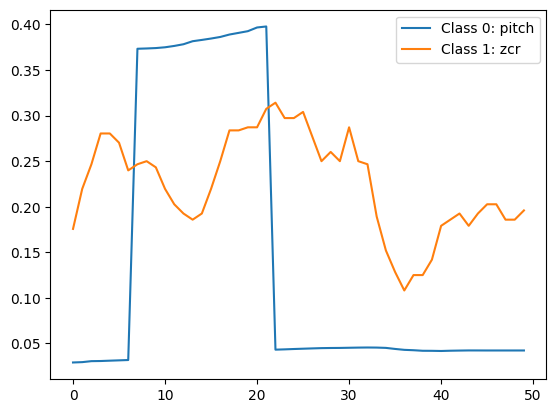

In [36]:
test_signal_index = 2

c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: pitch")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: zcr")
plt.legend()

## **Train/test -split**

In [37]:
train_size = 0.7
splitter = int(len(X) * train_size)

# split to train/test
x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [38]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

602578
258248
602578
258248


In [39]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [40]:
x_train

array([[[0.03663773],
        [0.04739881],
        [0.04729609],
        ...,
        [0.07975671],
        [0.07970654],
        [0.07968199]],

       [[0.10135135],
        [0.125     ],
        [0.19256757],
        ...,
        [0.21959459],
        [0.25      ],
        [0.24324324]],

       [[0.28040541],
        [0.29391892],
        [0.28378378],
        ...,
        [0.28040541],
        [0.29391892],
        [0.28040541]],

       ...,

       [[0.40202703],
        [0.40540541],
        [0.39864865],
        ...,
        [0.30067568],
        [0.32094595],
        [0.31756757]],

       [[0.00364173],
        [0.00353793],
        [0.00341024],
        ...,
        [0.05409586],
        [0.05419267],
        [0.0542215 ]],

       [[0.42905405],
        [0.48986486],
        [0.50675676],
        ...,
        [0.35472973],
        [0.37837838],
        [0.46283784]]])

## **Define a CNN- time series classification network for our data**

In [58]:
class_names = np.array(['pitch', 'zcr'])  

num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    model = keras.Sequential(
        [
            keras.layers.Input(input_shape),

            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),

            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dropout(0.3),

            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )

    return model


model = make_model(input_shape=x_train.shape[1:])

During the initial training the model showed some problems when it comes to the val loss. I had to adjust the epochs to get the model to train properly. And as part of the optimisation, I added an early stopping callback to prevent overfitting. Also i had to reduce the learning rate so my model would converge.


In [63]:
epochs = 200
batch_size = 256
opt = keras.optimizers.Adam(learning_rate=1e-6)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model2.keras", save_best_only=True, monitor="val_loss"
    ),    
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

]
model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)


Epoch 1/200
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - loss: 0.0063 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.0055 - val_sparse_categorical_accuracy: 0.9986
Epoch 2/200
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - loss: 0.0063 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.0056 - val_sparse_categorical_accuracy: 0.9986
Epoch 3/200
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.0062 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.0055 - val_sparse_categorical_accuracy: 0.9986
Epoch 4/200
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0061 - sparse_categorical_accuracy: 0.9985 - val_loss: 0.0055 - val_sparse_categorical_accuracy: 0.9986
Epoch 5/200
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - loss: 0.0061 - sparse_categorical_accuracy: 0.9985 - val_loss: 0.0055 - val_sparse_categorical_accuracy: 0.9986
Epoch 6/200
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0061 - sparse_categorical_accuracy: 0.9985 - val_loss: 0.0055 - val_sparse_cat

## **Metrics and plots**

<Axes: >

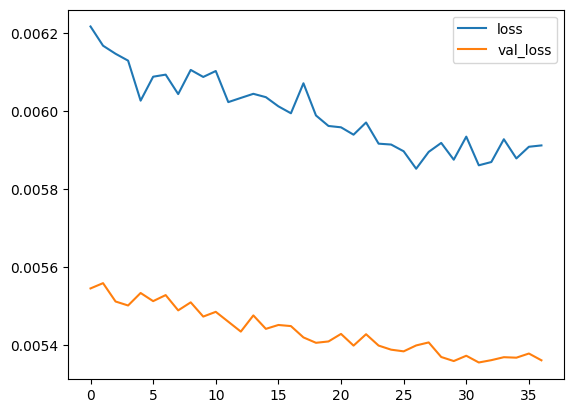

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

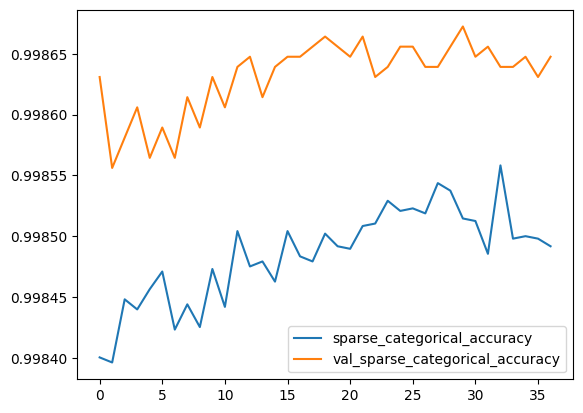

In [65]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

In [66]:
model = keras.models.load_model("best_model2.keras")

In [67]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[0.0050011747516691685, 0.9987879991531372]

Train data evaluation:
[0.0051568541675806046, 0.9986640810966492]


In [68]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

8071/8071 ━━━━━━━━━━━━━━━━━━━━ 8s 963us/step


In [69]:
auc_macro = roc_auc_score(y_test, test_predictions, multi_class='ovr', average='macro')
print(f"ROC-AUC (macro, OVR): {auc_macro:.4f}")

ROC-AUC (macro, OVR): 0.9988


<Axes: >

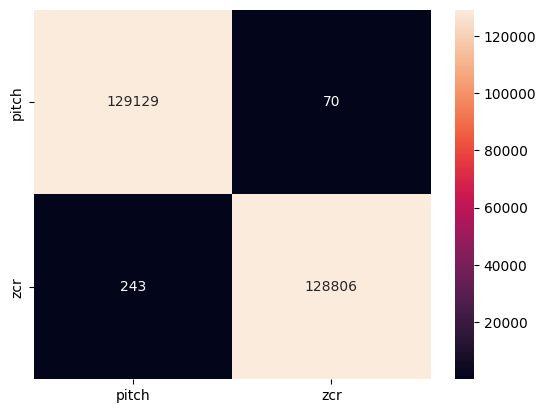

In [70]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

In [71]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=class_names))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))


              precision    recall  f1-score   support

       pitch       1.00      1.00      1.00    129199
         zcr       1.00      1.00      1.00    129049

    accuracy                           1.00    258248
   macro avg       1.00      1.00      1.00    258248
weighted avg       1.00      1.00      1.00    258248


Model overall accuracy: 99.88%


My Reflection on the metrics : 

The model got perfect results which is great on paper, it’s honestly too good to be true for a real-world problem. In real situations, time series data are noisy, unpredictable and rarely allow a model to classify everything perfectly.

The ROC-AUC = 1 also supports perfect separability i guess due to strong signal differences between variables.

Two potential interepretation : 
- The dataset was quite simple 
- The patterns between the two classes were very easy for the CNN to separate.

So even though the metrics look perfect, i wouldn’t expect this model to perform the same way with new or messier data. 

# Test the model with some imaginary/synthetic signal examples from your favorite Generative AI

ChatGPT generated this data based on the stats of my variables. Yes it worked but i guess if it is a more random data this model would be confused. Real data usually isn’t this clean so in real life the accuracy would definitely drop.

## **CLOUD COVER**

0
pitch


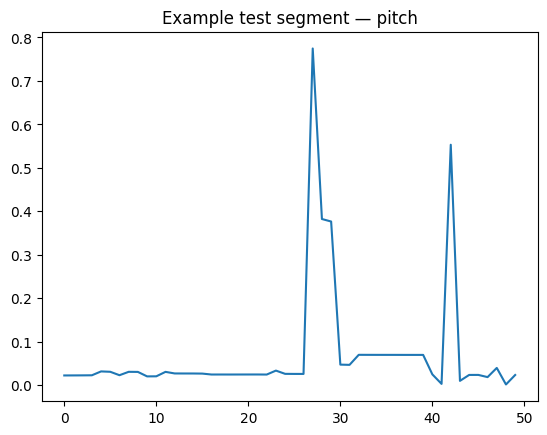

In [72]:
signal_index = int(np.where(y_test == 0)[0][0])  
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.title("Example test segment — pitch")
plt.show()

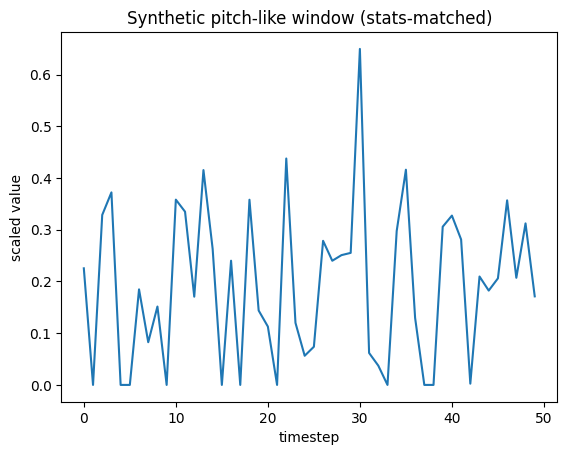

In [73]:
# =========================
# IMAGINARY MEAN Cloud Coverage SIGNAL with chatgpt
# =========================

cloud_idxs = np.where(y_test == 0)[0]
cloud_windows = x_test[cloud_idxs, :, 0]   

cloud_mean_per_t = cloud_windows.mean(axis=0)       
cloud_std_overall = cloud_windows.std()            
cloud_min, cloud_max = cloud_windows.min(), cloud_windows.max()


t = x_test.shape[1]
rng = np.random.default_rng(42)

y = cloud_mean_per_t + rng.normal(0, cloud_std_overall, size=t)

y = np.clip(y, cloud_min, cloud_max)

plt.plot(y)
plt.title("Synthetic pitch-like window (stats-matched)")
plt.xlabel("timestep"); plt.ylabel("scaled value")
plt.show()

In [74]:
test_signal = np.expand_dims(y, axis=1)    
test_batch  = np.array([test_signal])      
probs = model.predict(test_batch)[0]
print("Pred probs:", probs)
print(class_names[np.argmax(probs)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Pred probs: [1. 0.]
pitch


## **MEAN TEMPERATURE**

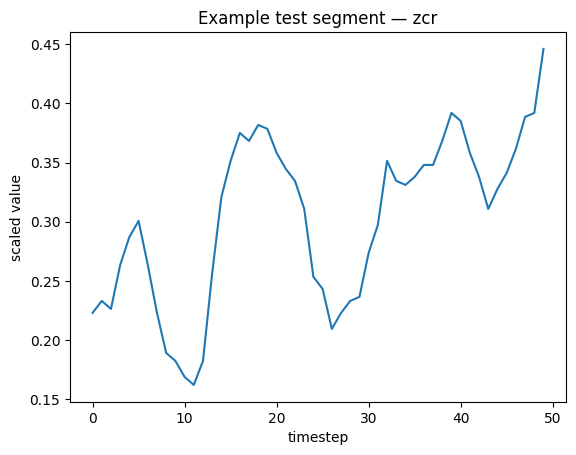

In [75]:
mean_temp_index = np.where(y_test == 1)[0][0]  


plt.plot(x_test[mean_temp_index])
plt.title("Example test segment — zcr")
plt.xlabel("timestep")
plt.ylabel("scaled value")
plt.show()

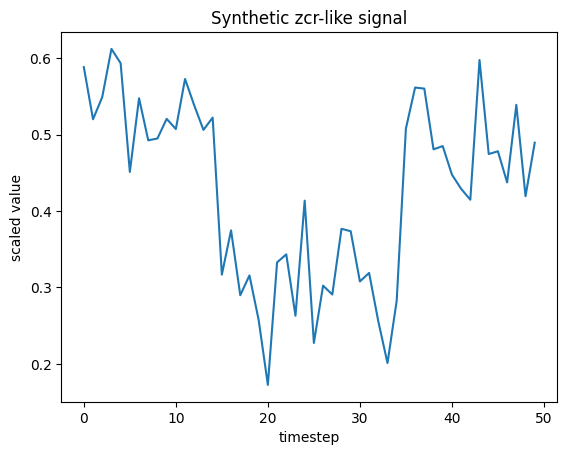

In [76]:
# =========================
# IMAGINARY MEAN TEMPERATURE SIGNAL with chatgpt
# =========================
t = x_test.shape[1]
x = np.arange(t)

np.random.seed(0)
y = 0.5 + np.random.normal(0, 0.05, size=t) 
mid = t // 2
y[mid - t//5 : mid + t//5] -= 0.2  
y = np.clip(y, 0, 1)

plt.plot(x, y)
plt.xlabel('timestep')
plt.ylabel('scaled value')
plt.title('Synthetic zcr-like signal')
plt.show()

In [77]:
# TRY OUR IMAGINARY MEAN TEMPERATURE SIGNAL WITH THE MODEL
test_signal = np.expand_dims(y, axis=1)
test_batch = np.array([test_signal])

test_predict = model.predict(test_batch)
print(test_predict)
print(class_names[np.argmax(test_predict)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[9.9999845e-01 1.5317806e-06]]
pitch
